In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
csv_path = "city_data.csv"
csv_path2 = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(csv_path)
ride_data = pd.read_csv(csv_path2)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
city_ride_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

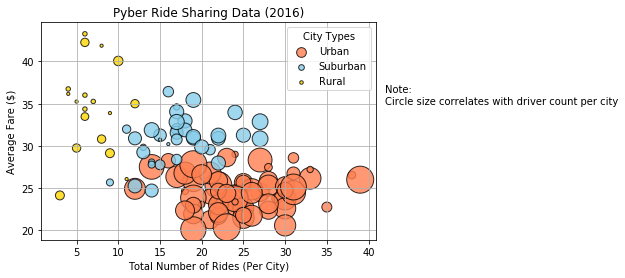

In [2]:
# Obtain the x and y coordinates for each of the three city types
# Urban average fare (x) and total ride count (y)
urban_data = city_ride_data.loc[city_ride_data["type"] == "Urban",:]
urban_city_group = urban_data.groupby('city')
urban_num_rides = urban_city_group["ride_id"].count()
urban_avg_fare = urban_city_group["fare"].mean()

# Suburban average fare (x) and total ride count (y)
suburban_data = city_ride_data.loc[city_ride_data["type"] == "Suburban",:]
suburban_city_group = suburban_data.groupby('city')
suburban_num_rides = suburban_city_group["ride_id"].count()
suburban_avg_fare = suburban_city_group["fare"].mean()

# Rural average fare (x) and total ride count (y)
rural_data = city_ride_data.loc[city_ride_data["type"] == "Rural",:]
rural_city_group = rural_data.groupby('city')
rural_num_rides = rural_city_group["ride_id"].count()
rural_avg_fare = rural_city_group["fare"].mean()

# Build the scatter plots for each city types
fig, ax= plt.subplots()

Urban = ax.scatter(urban_num_rides, urban_avg_fare, marker="o", facecolors="Coral", 
            edgecolors="black", s=10*urban_data["driver_count"], alpha=0.8, label="Urban")
Suburban = ax.scatter(suburban_num_rides, suburban_avg_fare, marker="o", facecolors="SkyBlue", 
            edgecolors="black", s=10*suburban_data["driver_count"], alpha=0.8, label="Suburban")            
Rural = ax.scatter(rural_num_rides, rural_avg_fare, marker="o", facecolors="Gold", 
            edgecolors="black", s=10*rural_data["driver_count"], alpha=0.8, label="Rural")           

# Incorporate the other graph properties
ax.set_title("Pyber Ride Sharing Data (2016)")
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.grid(True)
ax.text(42,35,"Note:\nCircle size correlates with driver count per city")

# Create a legend and incorporate a text label regarding circle size
ax.legend(handles=[Urban,Suburban,Rural],title="City Types",markerscale=.5,loc="best")

# Save Figure
plt.savefig("Pyber_Ride_Sharing.png",bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

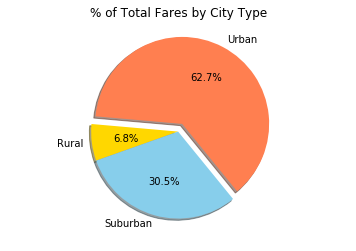

In [3]:
# Calculate Type Percents
total_fares = city_ride_data["fare"].sum()
ride_type_group = city_ride_data.groupby("type")
city_type_fares = ride_type_group["fare"].sum()

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["Gold", "SkyBlue", "Coral"]

# Set explode 
explode = (0, 0, 0.1)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(city_type_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=175)

# Save Figure
plt.savefig("Total_Fare_Pie.png",bbox_inches="tight")

# Show Figure
plt.show()

## Total Rides by City Type

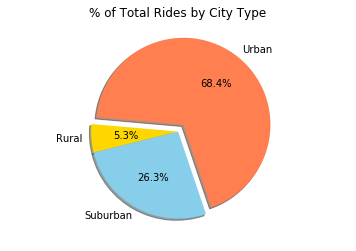

In [4]:
# Calculate Ride Percents
ride_type_group = city_ride_data.groupby("type")
ride_type_group_count = ride_type_group["ride_id"].count()

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["Gold", "SkyBlue", "Coral"]

# Set explode 
explode = (0, 0, 0.1)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(ride_type_group_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=175)

# Save Figure
plt.savefig("Total_Rides_Pie.png",bbox_inches="tight")

# Show Figure
plt.show()

## Total Drivers by City Type

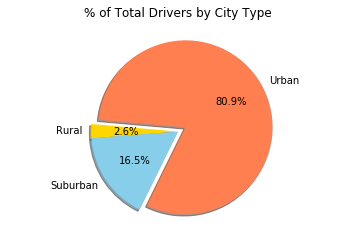

In [5]:
# Calculate Driver Percents
unique_cities = city_ride_data.drop_duplicates(subset='city', keep="last")

ride_type_group = unique_cities.groupby("type")

city_type_drivers = ride_type_group["driver_count"].sum()

#unique_names = purchase_data_df.drop_duplicates(subset='SN', keep="last")
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["Gold", "SkyBlue", "Coral"]

# Set explode 
explode = (0, 0, 0.1)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Build Pie Chart
plt.title("% of Total Drivers by City Type")
plt.pie(city_type_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=175)

# Save Figure
plt.savefig("Total_Drivers_Pie.png",bbox_inches="tight")

# Show Figure
plt.show()

In [ ]:
You must include a written description of three observable trends based on the data.

